In [6]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from astropy.timeseries import LombScargle
from constants import DATA_DIR
from numpy.polynomial import Chebyshev
from scipy.interpolate import CubicSpline, make_interp_spline

from astrofit.model.enums import EnumSortOption
from astrofit.utils import AsteroidLoader, LightcurveBinner, LightcurvePlotter

sns.set_theme(style="darkgrid")
plt.rcParams["figure.figsize"] = (14, 6)

In [7]:
asteroid_loader = AsteroidLoader(DATA_DIR)
lightcurve_binner = LightcurveBinner()
lightcurve_plotter = LightcurvePlotter()

In [8]:
asteroid_name = "Kalliope"


In [9]:
asteroid = asteroid_loader.load_asteroid(asteroid_name)
asteroid

Asteroid(id=22, name=Kalliope, period=4.1482015, lightcurves=139)

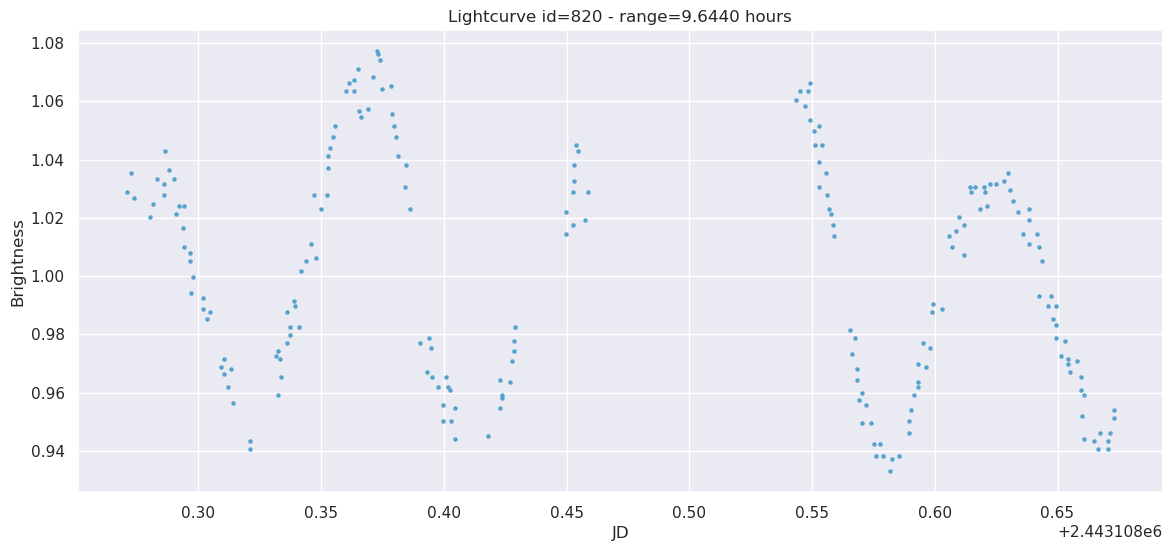

In [10]:
asteroid.get_longest_lightcurve(by=EnumSortOption.PERIOD).plot()

In [11]:
times = np.array(asteroid.get_longest_lightcurve(by=EnumSortOption.PERIOD).time_arr)
brightness = np.array(asteroid.get_longest_lightcurve(by=EnumSortOption.PERIOD).brightness_arr)

In [12]:
def get_uniformly_distributed_data(
    times: np.ndarray,
    brightness: np.ndarray,
    resolution: float = 0.002,
    plot: bool = False,
) -> tuple[np.ndarray, np.ndarray]:
    times_resolution = np.arange(times[0], times[-1] + 0.001, resolution)

    reduced_times = []
    reduced_brightness = []

    prev_time = times_resolution[0]
    for curr_time in times_resolution[1:]:
        mask = np.where((times >= prev_time) & (times < curr_time), True, False)
        if np.any(mask):
            # reduced_times.append(np.mean(times[mask]))
            reduced_times.append(prev_time + (curr_time - prev_time) / 2)
            reduced_brightness.append(np.mean(brightness[mask]))

        prev_time = curr_time

    reduced_times = np.array(reduced_times)
    reduced_brightness = np.array(reduced_brightness)

    if plot:
        plt.scatter(times, brightness, s=8)
        plt.vlines(times_resolution, min(brightness), max(brightness), alpha=0.5)
        plt.show()

        plt.scatter(reduced_times, reduced_brightness, s=8)
        plt.show()

    return reduced_times, reduced_brightness

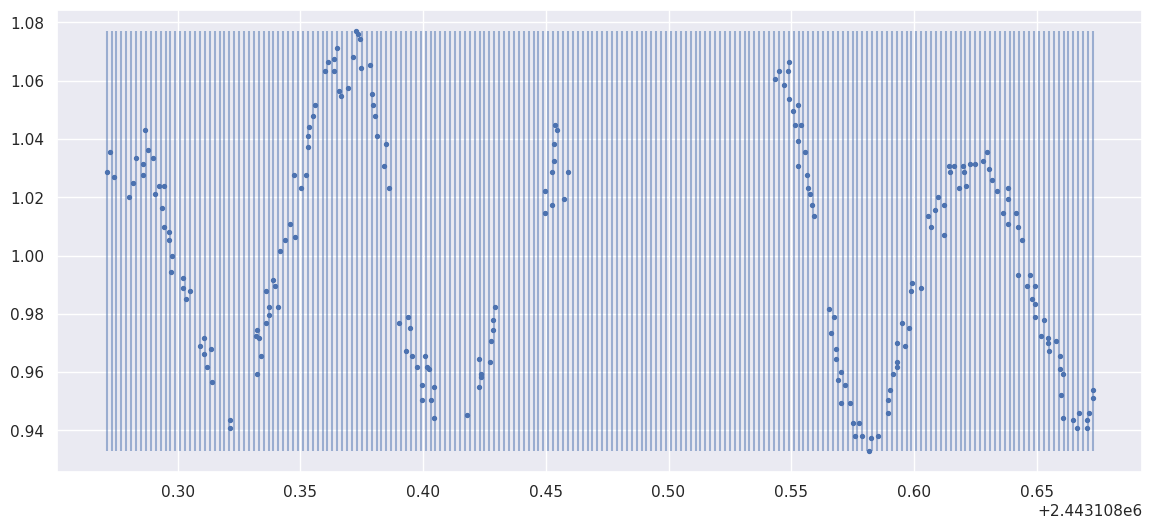

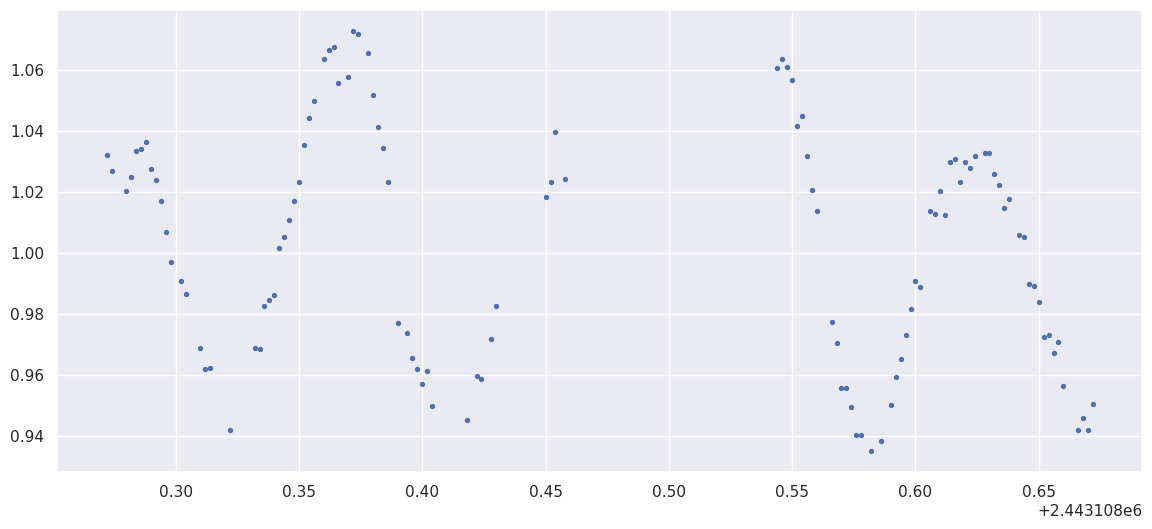

In [13]:
reduced_times, reduced_brightness = get_uniformly_distributed_data(times, brightness, plot=True)

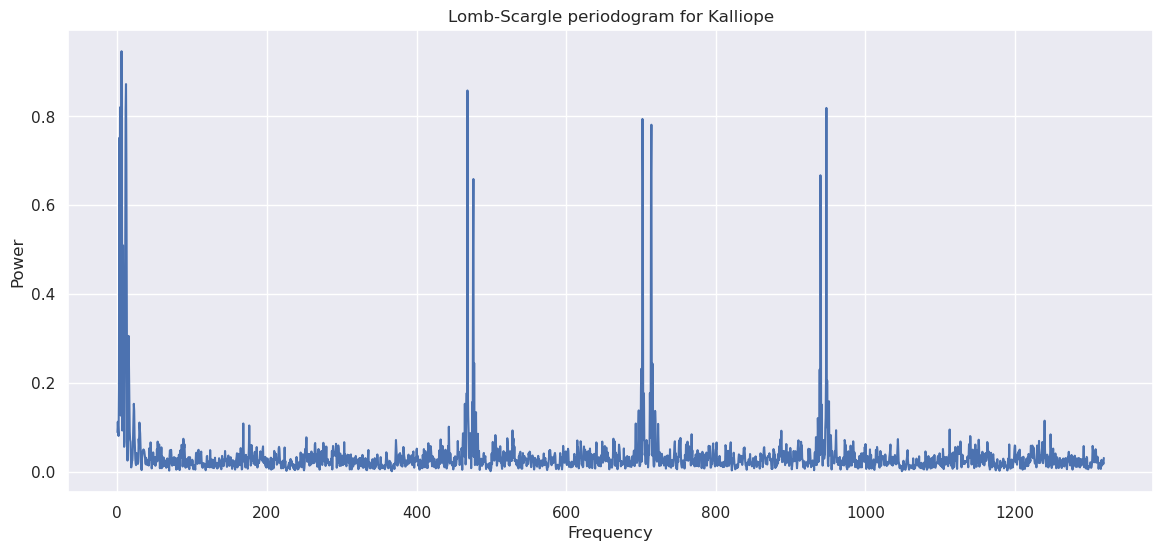

Best frequency: 5.723770818404131
Rotational period: 4.193040001327576h


In [14]:
ls = LombScargle(times, brightness, nterms=3)
frequency, power = ls.autopower()
fig = plt.plot(frequency, power)

plt.xlabel("Frequency")
plt.ylabel("Power")
plt.title(f"Lomb-Scargle periodogram for {asteroid_name}")
plt.show()

lomb_freq = frequency[np.argmax(power)]
lomb_period = 24 / lomb_freq

print(f"Best frequency: {lomb_freq}")
print(f"Rotational period: {lomb_period}h")

In [15]:
top_k_idx = np.argsort(power)[::-1][:100]
power_k = power[top_k_idx]
freq_k = frequency[top_k_idx]

for _power, _freq in zip(power_k, freq_k):
    print(f"Power: {_power}, Frequency: {_freq}")

Power: 0.9469907826261329, Frequency: 5.723770818404131
Power: 0.8729893517461489, Frequency: 11.696401237608441
Power: 0.8585739450867246, Frequency: 468.10490910513784
Power: 0.8206816524175553, Frequency: 3.7328940120026943
Power: 0.8192450619483304, Frequency: 947.9062194478842
Power: 0.813761674429193, Frequency: 11.198682036008082
Power: 0.7944133862429974, Frequency: 702.0329338573067
Power: 0.7814180530333465, Frequency: 713.9781946957153
Power: 0.7518208627326608, Frequency: 2.7374556088019757
Power: 0.6955127073747358, Frequency: 12.1941204392088
Power: 0.680850820625521, Frequency: 6.221490020004491
Power: 0.6705840011491143, Frequency: 713.4804754941149
Power: 0.6675195214742363, Frequency: 939.9427122222784
Power: 0.6591268897668958, Frequency: 476.0684163307436
Power: 0.6556009841743937, Frequency: 702.530653058907
Power: 0.5096074049122482, Frequency: 7.7146476248055675
Power: 0.5084576414428574, Frequency: 475.57069712914324
Power: 0.4952183188090172, Frequency: 10.7009

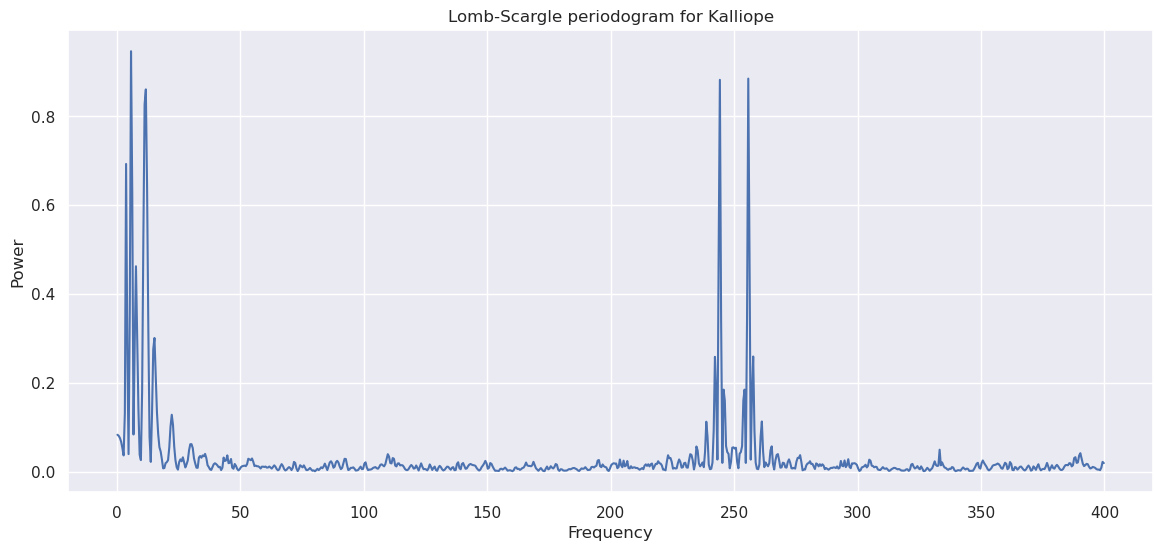

Best frequency: 5.750000396277783
Rotational period: 4.173912755821062h


In [17]:
ls = LombScargle(reduced_times, reduced_brightness, nterms=2)
frequency, power = ls.autopower(maximum_frequency=400)
fig = plt.plot(frequency, power)

plt.xlabel("Frequency")
plt.ylabel("Power")
plt.title(f"Lomb-Scargle periodogram for {asteroid_name}")
plt.show()

top_10_freqs = frequency[np.argsort(power)[-100:]]
top_10_periods = 24 / top_10_freqs

lomb_freq = frequency[np.argmax(power)]
lomb_period = 24 / lomb_freq

print(f"Best frequency: {lomb_freq}")
print(f"Rotational period: {lomb_period}h")

In [18]:
for ind, period in enumerate(top_10_periods):
    print(f"F: {top_10_freqs[ind]}, P: {period}h")

F: 34.25000236043723, P: 0.7007298787144849h
F: 33.25000229151936, P: 0.7218044615329655h
F: 43.25000298069811, P: 0.5549132565542452h
F: 26.750001843553164, P: 0.8971961998493871h
F: 388.2500267573651, P: 0.06181583604886312h
F: 110.25000759819577, P: 0.2176870598274023h
F: 35.250002429355106, P: 0.6808510169069817h
F: 33.75000232597829, P: 0.7111110621028476h
F: 389.7500268607419, P: 0.06157793032962439h
F: 34.75000239489617, P: 0.6906474344164346h
F: 2.7500001895241577, P: 8.727272125807673h
F: 44.750003084074926, P: 0.5363128122004716h
F: 223.25001538591567, P: 0.10750279214320764h
F: 276.75001907302203, P: 0.08672086123205458h
F: 232.7500160406355, P: 0.10311492307613794h
F: 267.2500184183022, P: 0.08980354853497138h
F: 9.250000637490349, P: 2.5945944157806595h
F: 232.25001600617657, P: 0.10333691429912209h
F: 109.75000756373683, P: 0.2186788004188711h
F: 267.75001845276114, P: 0.08963584816422449h
F: 4.750000327359908, P: 5.052631230730759h
F: 35.75000246381404, P: 0.671328625062

In [19]:
asteroid.period

4.1482015

In [20]:
times_resolution = np.arange(reduced_times[0], reduced_times[-1] + 0.001, 0.002)

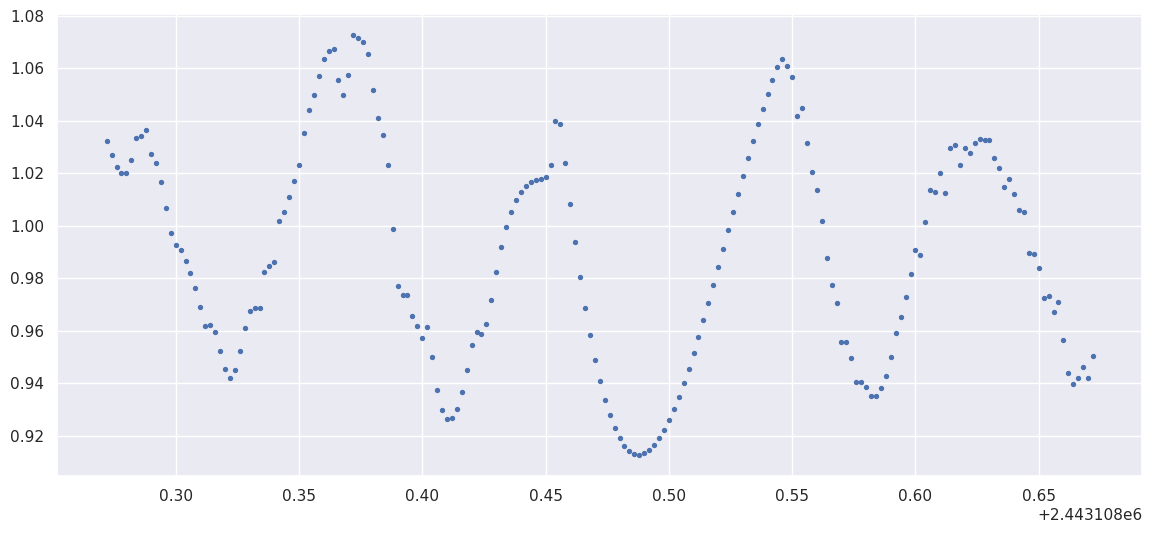

In [21]:
cubic_spline = CubicSpline(reduced_times, reduced_brightness)
brightness_test = cubic_spline(times_resolution)

_ = plt.scatter(times_resolution, brightness_test, s=8)

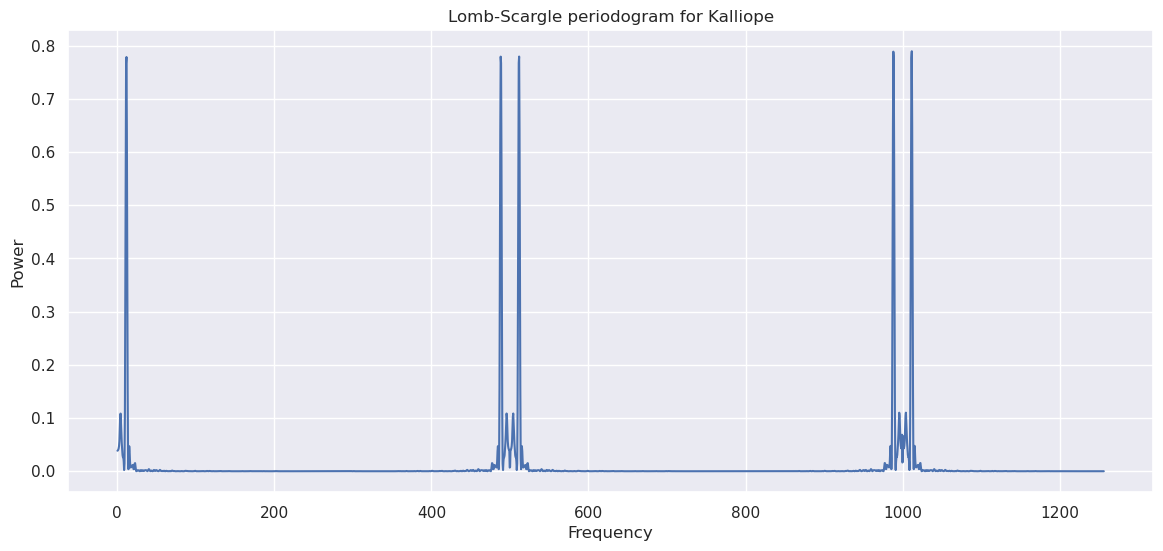

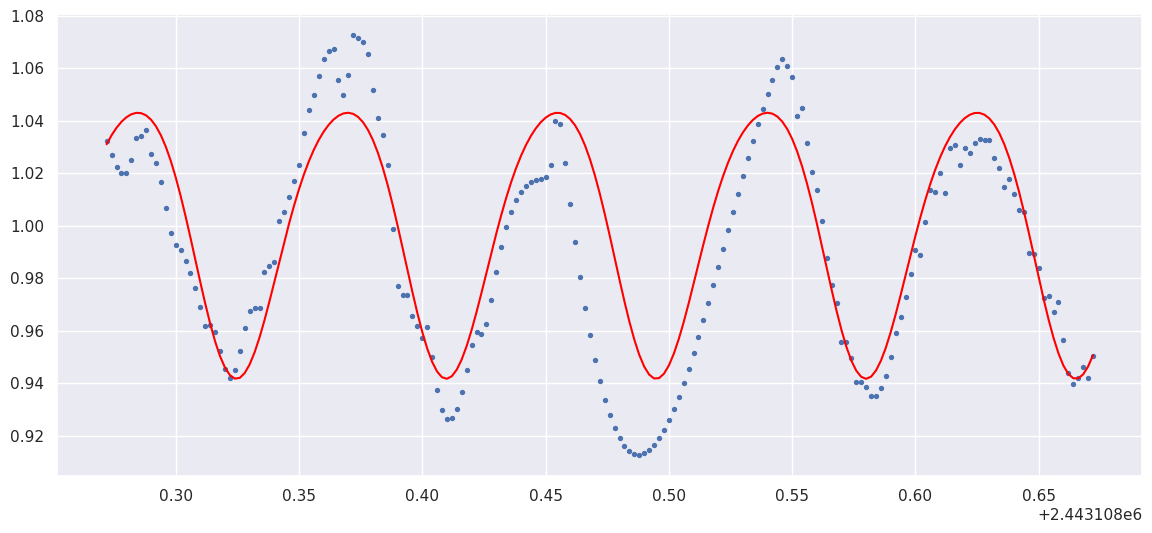

Best frequency: 1011.7500697276604
Rotational period: 0.023721273383712483h


In [22]:
frequency, power = LombScargle(times_resolution, brightness_test).autopower()
fig = plt.plot(frequency, power)

plt.xlabel("Frequency")
plt.ylabel("Power")
plt.title(f"Lomb-Scargle periodogram for {asteroid_name}")
plt.show()

lomb_freq = frequency[np.argmax(power)]
lomb_period = 24 / lomb_freq

y_fit = ls.model(times_resolution, lomb_freq)
plt.scatter(times_resolution, brightness_test, s=8)
plt.plot(times_resolution, y_fit, color="red")
plt.show()


print(f"Best frequency: {lomb_freq}")
print(f"Rotational period: {lomb_period}h")

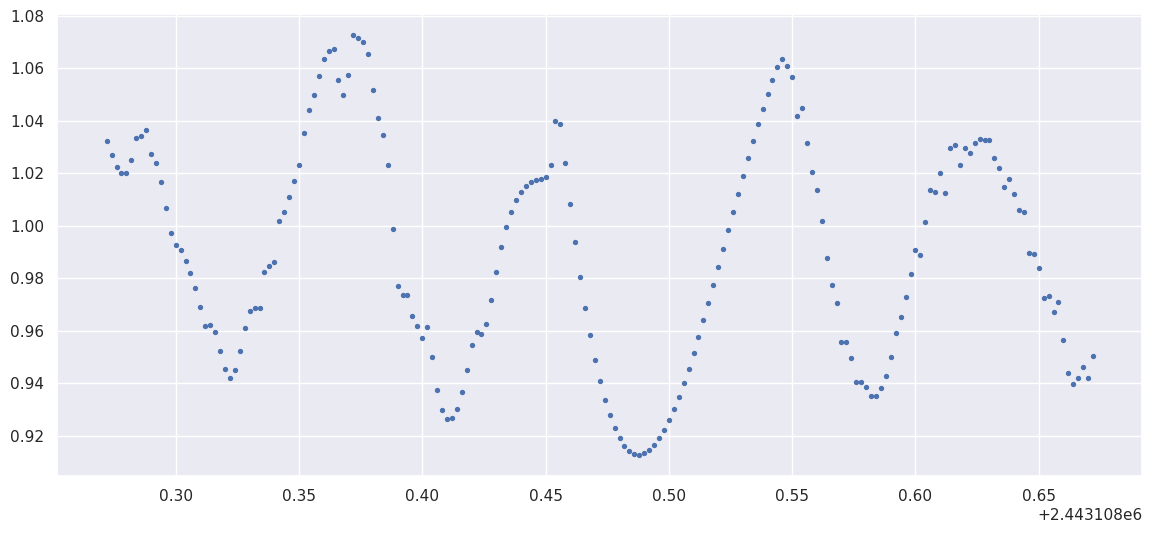

In [23]:
bspl = make_interp_spline(reduced_times, reduced_brightness, k=3)
brightness_test = bspl(times_resolution)

_ = plt.scatter(times_resolution, brightness_test, s=8)

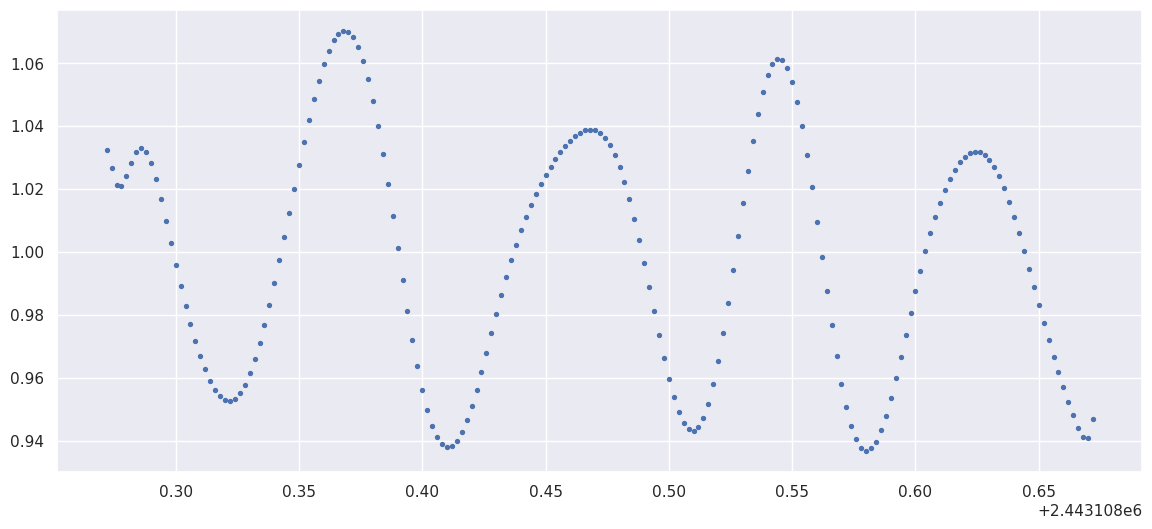

In [24]:
c = Chebyshev.fit(times, brightness, 25)
brightness_test = c(times_resolution)

_ = plt.scatter(times_resolution, brightness_test, s=8)